In [1]:
%reload_ext autoreload
%autoreload 2

# Imports

In [2]:
from kret_notebook import *  # NOTE import first
from kret_matplotlib.mpl_nb_imports import *
from kret_np_pd.np_pd_nb_imports import *
from kret_polars.polars_nb_imports import *
from kret_rosetta.rosetta_nb_imports import *
from kret_sklearn.sklearn_nb_imports import *
from kret_torch_utils.torch_nb_imports import *
from kret_lightning.lightning_nb_imports import *
from kret_tqdm.tqdm_nb_imports import *
from kret_type_hints.types_nb_imports import *
from kret_utils.utils_nb_imports import *

# from kret_wandb.wandb_nb_imports import *  # NOTE this is slow to import

[kret_np_pd.np_pd_nb_imports] Imported kret_np_pd.np_pd_nb_imports in 0.0253 seconds
Loaded environment variables from /Users/Akseldkw/coding/projects_kretsinger/.env
[kret_matplotlib.mpl_nb_imports] Imported kret_matplotlib.mpl_nb_imports in 0.2028 seconds
[kret_polars.polars_nb_imports] Imported kret_polars.polars_nb_imports in 0.0793 seconds
[kret_rosetta.rosetta_nb_imports] Imported kret_rosetta.rosetta_nb_imports in 0.0000 seconds
[kret_sklearn.sklearn_nb_imports] Imported kret_sklearn.sklearn_nb_imports in 0.1368 seconds
[kret_torch_utils.torch_nb_imports] Imported kret_torch_utils.torch_nb_imports in 0.3714 seconds
[kret_lightning.lightning_nb_imports] Imported kret_lightning.lightning_nb_imports in 0.0014 seconds
[kret_tqdm.tqdm_nb_imports] Imported kret_tqdm.tqdm_nb_imports in 0.0000 seconds
[kret_type_hints.types_nb_imports] Imported kret_type_hints.types_nb_imports in 0.0006 seconds
[kret_utils.utils_nb_imports] Imported kret_utils.utils_nb_imports in 0.0006 seconds


In [3]:
from projects.beijing.beijing_datamodule import BeijingDataModule
from projects.beijing.beijing_models import BeijingAirQualityLSTM
from projects.beijing.load_beijing_data import load_beijing_air_quality_data  # project_kretsinger

# Define Pipeline

In [4]:
float_cols = ["pm2.5", "year", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
date_cols = ["month", "day", "hour"]
wind_cols = ["cbwd"]

In [5]:
date_time_normalizer = DateTimeSinCosNormalizer(
    datetime_cols={"month": 12, "day": 31, "hour": 24}
)  # Normalize 'month' and 'hour' columns
power_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

wind_encoder = OrdinalEncoder()

column_transform = ColumnTransformer(
    transformers=[
        ("datetime", date_time_normalizer, date_cols),
        ("scaler", power_transformer, float_cols),
        ("windlabel", wind_encoder, wind_cols),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    verbose=True,
)

In [6]:
pipeline_x = PipelinePD(steps=[("column_transform", column_transform)])
pipeline_y = PipelinePD(steps=[("scaler", power_transformer)])

# Load Data

In [7]:
beijing_dm = BeijingDataModule(UKS_PATHS.DATA_DIR / "beijing", 24, (pipeline_x, pipeline_y))
beijing_dm.post_init(batch_size=64, num_workers=4)

Saving hparams, ignoring ('pipeline_pd',)


# Implementation

## Instantiate model

In [8]:
# out =beijing_dm.data_preprocess()

In [9]:
beijing_dm.hparams_initial

"data_dir":        /Users/Akseldkw/coding/data_kretsinger/beijing
"sequence_length": 24
"split":           None

In [10]:
beijing_lstm = BeijingAirQualityLSTM(seq_length=beijing_dm.hparams_initial.sequence_length)
beijing_lstm.hparams_initial

Saving hparams, ignoring ()


"dropout":           0.3
"gamma":             0.5
"hidden_size":       64
"l1_penalty":        0.0
"l2_penalty":        0.0
"lr":                0.001
"num_cont_features": 14
"num_layers":        2
"patience":          10
"seq_length":        24
"stepsize":          12

In [11]:
logger = CSVLogger(**beijing_lstm.save_load_logging_dict)

In [12]:
static_args = TrainerStaticDefaults.TRAINER_QUICK_ITER
static_args

{'min_epochs': 5,
 'max_epochs': 5,
 'check_val_every_n_epoch': 1,
 'log_every_n_steps': 10,
 'limit_val_batches': 0.1,
 'limit_test_batches': 0.1}

In [13]:
static_args["max_epochs"] = 12

In [14]:
dynamic_args = TrainerDynamicDefaults.trainer_dynamic_defaults(beijing_lstm, beijing_dm)
dynamic_args

{'logger': <lightning.pytorch.loggers.csv_logs.CSVLogger at 0x3203e3b60>,
 'default_root_dir': PosixPath('/Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000')}

In [15]:
trainer_args = static_args | dynamic_args

In [16]:
trainer = L.Trainer(**trainer_args)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


## Train Model

In [17]:
raise ValueError("Stop here")  # STOP

ValueError: Stop here

In [18]:
trainer.fit(model=beijing_lstm, datamodule=beijing_dm)  # , ckpt_path=beijing_lstm.ckpt_file_name())

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
/Users/Akseldkw/micromamba/envs/kret_312/lib/python3.12/site-packages/lightning/fabric/loggers/csv_logs.py:268: Experiment logs directory /Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!


Setting up data for stage: TrainerFn.FITTING
Removed 2067 rows, representing 4.72% of the data
[ColumnTransformer] ...... (1 of 3) Processing datetime, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing scaler, total=   0.1s
[ColumnTransformer] ..... (3 of 3) Processing windlabel, total=   0.0s
Setting up data for stage: validate
Removed 2067 rows, representing 4.72% of the data


/Users/Akseldkw/micromamba/envs/kret_312/lib/python3.12/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:881: Checkpoint directory /Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000 exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type       ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ wind_embedding │ Embedding  │     32 │ train │     0 │
│ 1 │ lstm           │ LSTM       │ 55.8 K │ train │     0 │
│ 2 │ model          │ Sequential │  6.3 K │ train │     0 │
└───┴────────────────┴────────────┴────────┴───────┴───────┘

Trainable params: 62.1 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 62.1 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 10                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

Metric val_loss improved. New best score: 0.058
Epoch 0, global step 522: 'val_loss' reached 0.05811 (best 0.05811), saving model to '/Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000/best-epoch=00-val_loss=0.06.ckpt' as top 1


Metric val_loss improved by 0.037 >= min_delta = 0.0001. New best score: 0.021
Epoch 1, global step 1044: 'val_loss' reached 0.02107 (best 0.02107), saving model to '/Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000/best-epoch=01-val_loss=0.02.ckpt' as top 1


Epoch 2, global step 1566: 'val_loss' was not in top 1


Epoch 3, global step 2088: 'val_loss' was not in top 1


Epoch 4, global step 2610: 'val_loss' was not in top 1


Epoch 5, global step 3132: 'val_loss' was not in top 1


Epoch 6, global step 3654: 'val_loss' was not in top 1


Epoch 7, global step 4176: 'val_loss' was not in top 1


Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 0.018
Epoch 8, global step 4698: 'val_loss' reached 0.01819 (best 0.01819), saving model to '/Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000/best-epoch=08-val_loss=0.02.ckpt' as top 1


Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 0.015
Epoch 9, global step 5220: 'val_loss' reached 0.01513 (best 0.01513), saving model to '/Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000/best-epoch=09-val_loss=0.02.ckpt' as top 1


Epoch 10, global step 5742: 'val_loss' was not in top 1


Epoch 11, global step 6264: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=12` reached.


## Load Model

In [19]:
checkpoint_path = beijing_lstm.ckpt_file_name()
checkpoint_path

PosixPath('/Users/Akseldkw/coding/data_kretsinger/lightning_logs/BeijingAirQualityLSTM/v_000/best-epoch=12-val_loss=0.00.ckpt')

In [20]:
# beijing_lstm = BeijingAirQualityLSTM.load_from_checkpoint(checkpoint_path, weights_only=False)

# Plot Results

In [21]:
# _ = beijing_dm.data_preprocess()

In [22]:
tensor1d = TensorDatasetCustom.from_pd_xy(beijing_dm.x_y_processed.X, beijing_dm.x_y_processed.y)
tensor_temporal = UKS_TORCH_UTILS.create_sequence(tensor1d, sequence_length=beijing_dm.sequence_length, target_offset=0)

In [23]:
y_val = tensor_temporal.tensors[1].to(beijing_lstm.device)
y_val.shape

torch.Size([41733, 1])

In [24]:
y_hat = beijing_lstm(tensor_temporal.tensors[0].to(beijing_lstm.device))

In [25]:
r2_score(y_hat, y_val)

tensor(0.9399, grad_fn=<MeanBackward0>)

In [26]:
fig, ax = UKS_MPL.subplots(1, 1)

In [27]:
ax.plot(y_val.numpy(force=True), y_hat.numpy(force=True), linestyle="", marker="o", alpha=0.1)

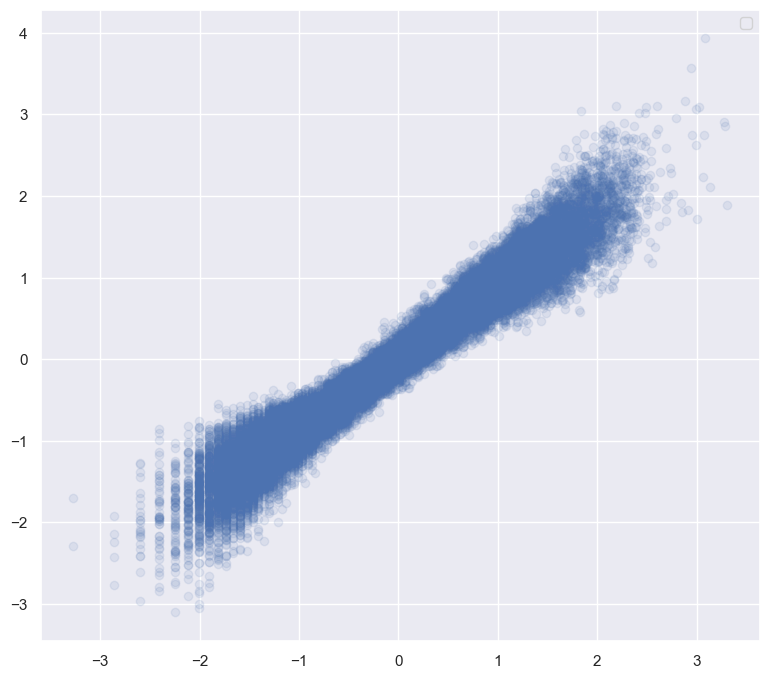

In [28]:
fig

# Sandbox

In [29]:
from kret_matplotlib.groupscatter import GroupScatter

In [30]:
ones = np.ones_like(y_val.squeeze(-1).numpy(force=True))
random_ints = np.random.randint(0, 5, size=y_val.shape[0])

In [31]:
gs = GroupScatter(y_val, y_hat, random_ints)

In [39]:
type(gs._df_input.category)

pandas.core.series.Series

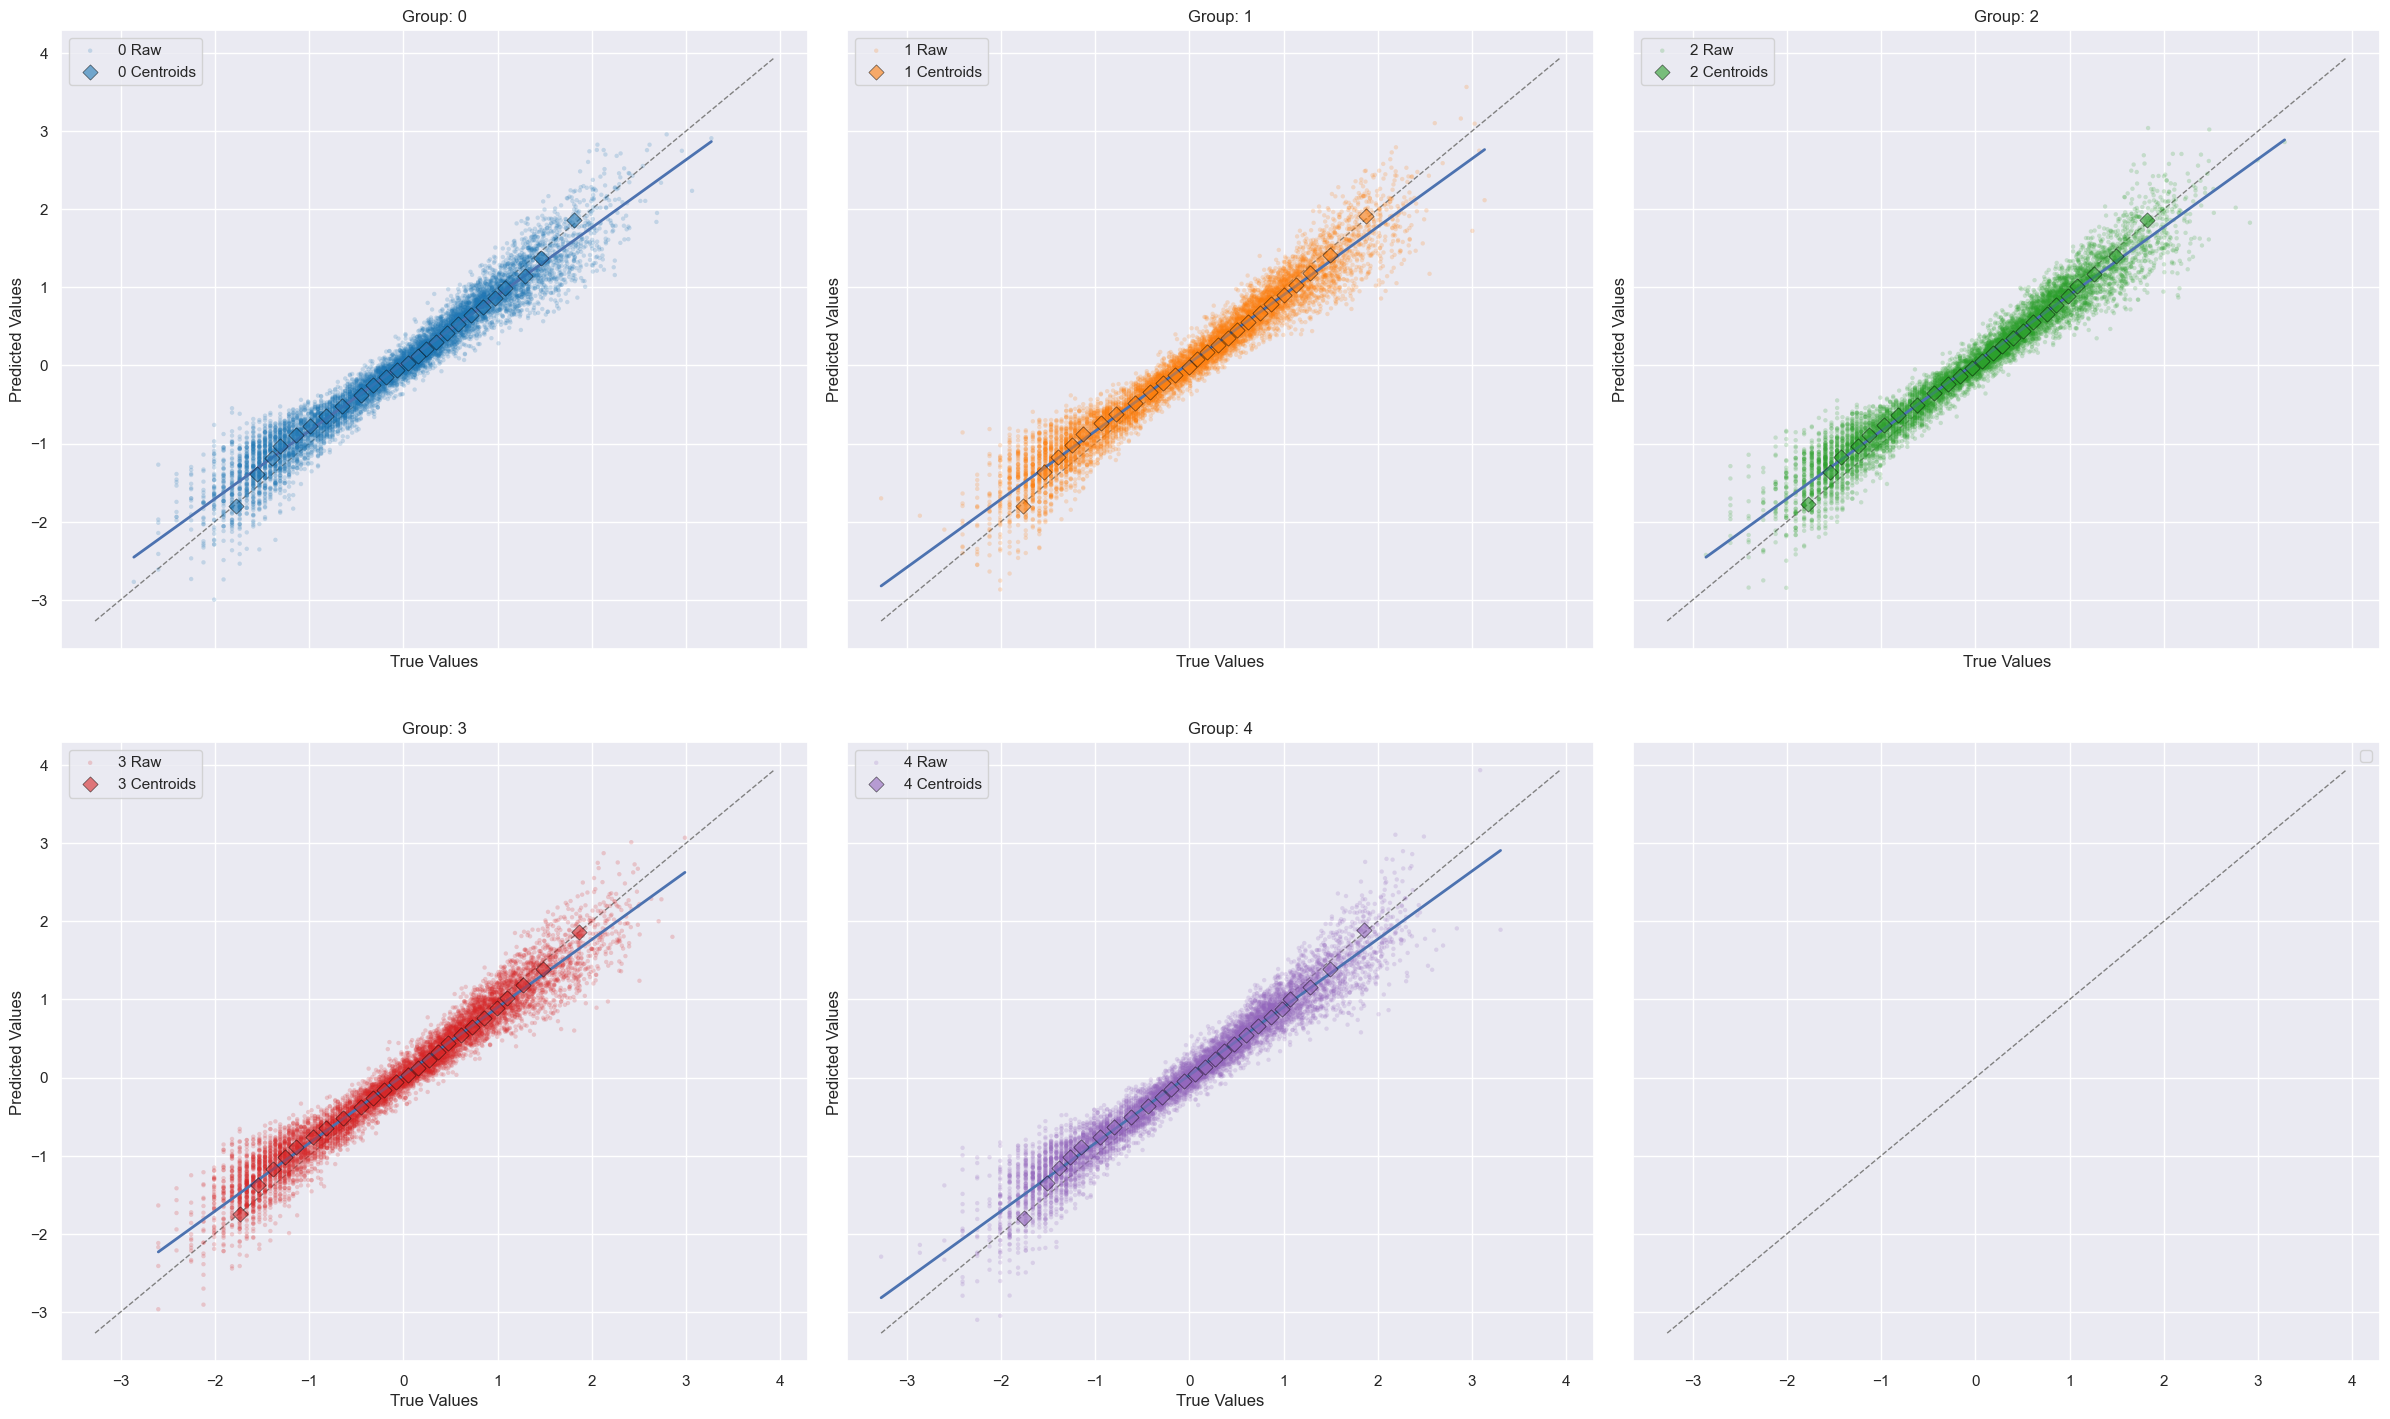

In [40]:
gs.plot(ax="separate", scatters=("raw", "centroids"))